### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load The Dataset and cleaning it 

In [3]:
df=pd.read_csv('Fish.csv')

In [4]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


- ###### The data is Clean no null value found , no repeated columns wre found and each column has it's corrected datatype

# Explore The DataSet
### Description of the dataset

In [8]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


- ###### the Standard divination `Weight`  column is high that indicates that most of this column data point are far form the mean value  
- ###### the Standard divination `Width`   column is low that indicates that most of this column data point are close to the mean value-

### Is The Data Correlated to each other  

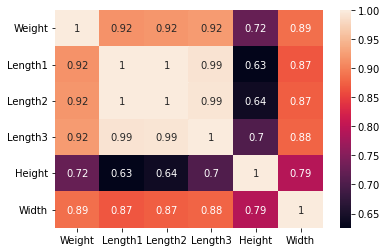

In [11]:
sns.heatmap(df.corr(),annot=True)

- ###### there is very high corelation between `Weight` column and all other columns 
- ###### That Means Also, That The Weight Of The weight of the fish can be affected greatly by other columns in the dataset

### What Is the Covariance and Correlation of all the dataset  

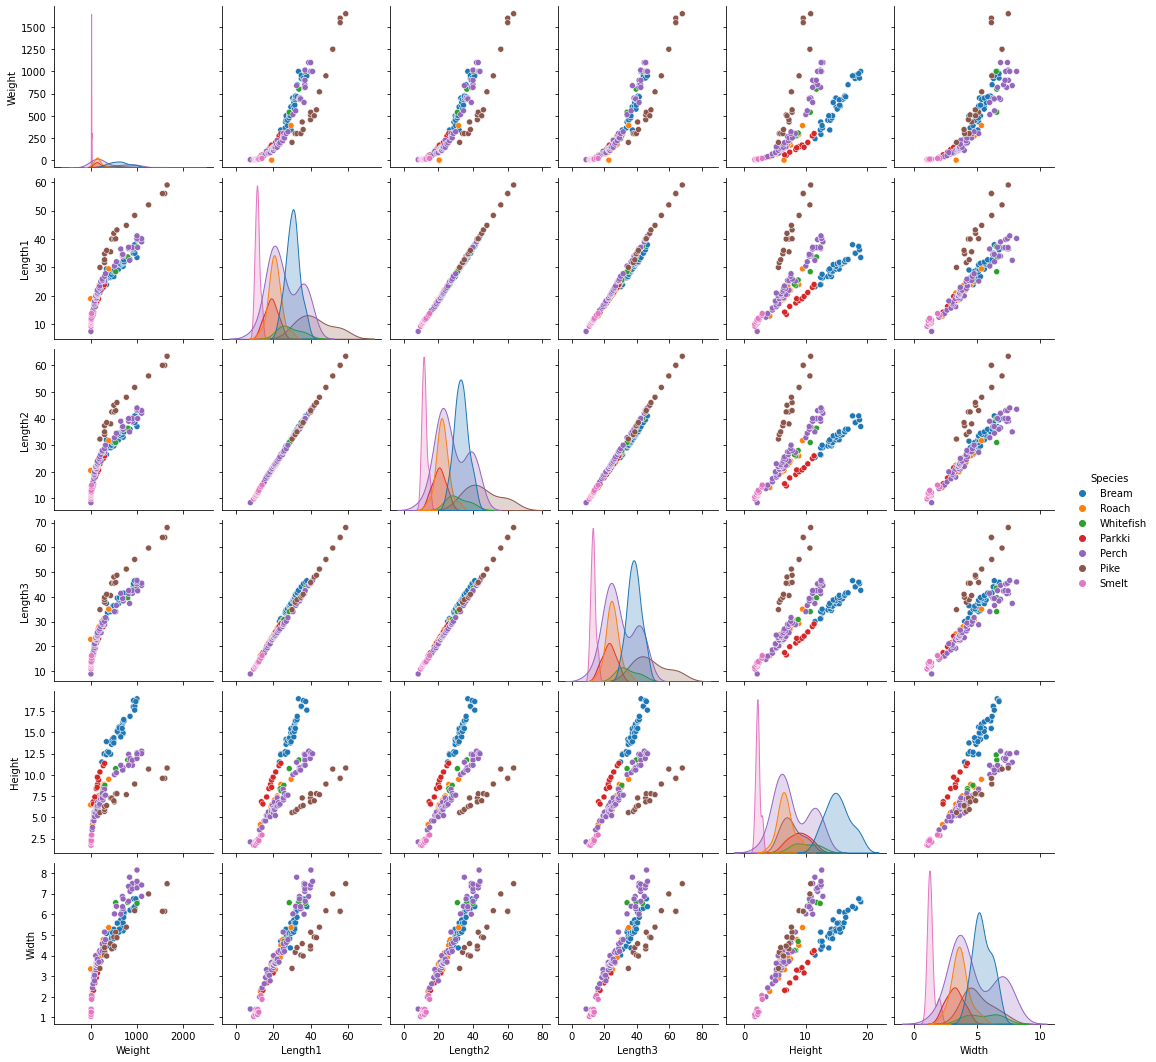

In [13]:
sns.pairplot(df,hue='Species')

- ###### The `Weight` Have polynomial  relation  with `Height` `Length1` `Length2` `Length3`

### What is the relation Between  The `Species`  and `Weight`

In [14]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

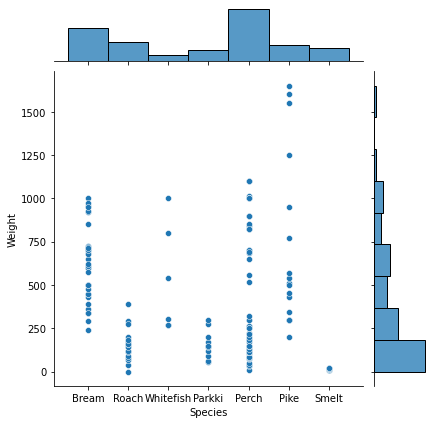

In [15]:
sns.jointplot(x='Species',y='Weight',data=df)

In [16]:
df.pivot_table(values='Weight',columns='Species',aggfunc=np.mean)

Species,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
Weight,617.828571,154.818182,382.239286,718.705882,152.05,11.178571,531.0


- ###### There are two spices that dominates the dataset and have higher average weight than the others, `Bream` and `Pike` are those species      
- ###### That Means also That Fish Specie Can Be Considered as important feature to determine the `Weight` of the fish 

In [17]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

# Train LinearRegression Model With `Length1` `Length2`, `Length3` ,  `Height`  To predict `Weight` Column 

In [50]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [52]:
X=df.iloc[:,2:7]
y=df['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
lm.intercept_

-460.120408561016

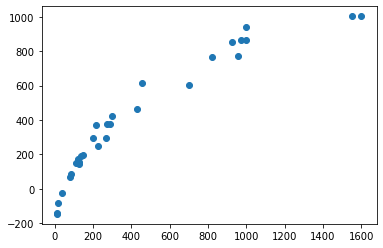

In [54]:
plt.scatter(y_test,lm.predict(X_test))


In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, lm.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lm.predict(X_test))))
print('r2_score:', metrics.r2_score(y_test,lm.predict(X_test)))


MAE: 107.61027967995955
MSE: 28430.436470429166
RMSE: 168.61327489385042
r2_score: 0.8529757935817524


- ###### Model Performance It Can Be Considered as Well Performance    

----

# Train LinearRegression Model With `Length1` `Length2`, `Length3` ,  `Height`  To predict `Weight` Column  ,
----
Using Only The High correlated columns we found in the Data Explore Part and State Column ,also  Applying Polynomial Transform on the dataset

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
X=df.iloc[:,2:7]
y=df['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

poly_transform=PolynomialFeatures(degree=2)
X_train_poly=poly_transform.fit_transform(X_train)

lm = LinearRegression()
lm.fit(X_train_poly,y_train)

LinearRegression()

In [61]:
lm.intercept_

142.06883188900804

In [62]:
lm.predict(poly_transform.fit_transform(X_test))

array([ 1.09854785e+03,  1.07983855e+02,  2.49472162e+02,  1.94274928e+02,
        1.16397796e+03,  9.90346977e+02,  9.33835993e+01,  1.21695044e+03,
        5.81545307e+02,  3.22789255e+01,  8.11080839e+02,  1.59960688e+02,
        1.16461594e+02,  1.13810438e+02,  2.87984590e+02,  1.16280852e+02,
        8.49164161e+01,  1.53720247e+02,  3.93289102e+02,  2.89742962e+02,
        1.06417544e+03,  1.39218307e+02,  1.14267768e+02,  2.00497896e+02,
       -2.42565067e+00,  9.58015374e+02,  4.77259113e+02,  3.17210584e+02,
       -1.12123889e+00,  1.70925946e+01,  1.21695044e+03,  1.84479185e+02])

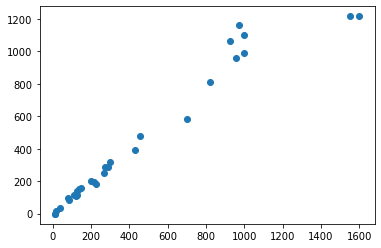

In [63]:
plt.scatter(y_test,lm.predict(poly_transform.fit_transform(X_test)))


In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, lm.predict(poly_transform.fit_transform(X_test))))
print('MSE:', metrics.mean_squared_error(y_test, lm.predict(poly_transform.fit_transform(X_test))))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lm.predict(poly_transform.fit_transform(X_test)))))
print('r2_score:', metrics.r2_score(y_test,lm.predict(poly_transform.fit_transform(X_test))))


MAE: 49.44716480817256
MSE: 10719.536289132173
RMSE: 103.53519348092306
r2_score: 0.9445653492615032


- ###### Model Performance (r2 Score) Increased from 
    **`85%`** to be **`94%`**

# Train LinearRegression Model With `Length1` `Length2`, `Length3` ,  `Height` ,`Specie` To predict `Weight` Column  ,
----
Using Only The High correlated columns we found in the Data Explore Part  

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [107]:
df=pd.read_csv('Fish.csv')

In [115]:
X=df[['Species', 'Length1', 'Length2', 'Length3', 'Height','Width']]
y=df['Weight']

#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7], )],remainder='passthrough')
#ct=OneHotEncoder()
X = pd.get_dummies(X).values
X

array([[23.2, 25.4, 30. , ...,  0. ,  0. ,  0. ],
       [24. , 26.3, 31.2, ...,  0. ,  0. ,  0. ],
       [23.9, 26.5, 31.1, ...,  0. ,  0. ,  0. ],
       ...,
       [12.1, 13. , 13.8, ...,  0. ,  1. ,  0. ],
       [13.2, 14.3, 15.2, ...,  0. ,  1. ,  0. ],
       [13.8, 15. , 16.2, ...,  0. ,  1. ,  0. ]])

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [120]:
lm.intercept_

-735.2393208928903

In [121]:
print('MAE:', metrics.mean_absolute_error(y_test, lm.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lm.predict(X_test))))
print('r2_score:', metrics.r2_score(y_test,lm.predict(X_test)))


MAE: 73.07149615104046
MSE: 15769.983380681091
RMSE: 125.57859443663594
r2_score: 0.918447636420033


> ## The Model Performance Increased    
- From   **`85%`** <br>
   - By Using All Numerical Columns [, 'Length1', 'Length2', 'Length3', 'Height','Width'] to Predict `Weight`  <br>
<br>

- to     **`91%`** <br>  
   - By Using All Numerical Columns [, 'Length1', 'Length2', 'Length3', 'Height','Width'] and apply OneHotEncoding to `Species` column to Predict `Weight`<br>
<br>

- to     **`94%`**  <br>
   - By Using All Numerical Columns [, 'Length1', 'Length2', 'Length3', 'Height','Width'] and apply Polynomial Transformation ot it Predict `Weight`<br>